In [55]:
import numpy as np
from typing import Any, Union, List, Tuple

import numpy.typing as npt
import plotly.graph_objects as go
import plotly.express as px

import pandas as pd
from sklearn.model_selection import train_test_split, KFold

from tqdm import tqdm

In [6]:
def assert_np_shape(a, shape: Union[List, Tuple]) -> bool:
    if len(a.shape) != len(shape):
        return False

    for dim in zip(a.shape, shape):
        if isinstance(dim[1], int) is False:
            continue
        if dim[0] != dim[1]:
            return False

    return True


a = np.array([[1, 2], [3, 4]])
assert assert_np_shape(a, [2, 2])
assert assert_np_shape(a, [2, "n"])
# assert assert_np_shape(a, [2,])

# Part I

## 1.1 Linear Regression

### Q1

In [7]:
x = np.array([[i] for i in [1, 2, 3, 4]])
print(x, x.shape)

# define x as a column vector

[[1]
 [2]
 [3]
 [4]] (4, 1)


In [8]:
y = np.array([[i] for i in [3, 2, 0, 5]])
print(y, y.shape)

# define y as a column vector

[[3]
 [2]
 [0]
 [5]] (4, 1)


In [9]:
def make_linear_X_matrix(x, k: int):
    """
    make_linear_X_matrix make the X matrix of shape (m, k)

    depending on the basis function defined by k the number of columns
    of matrix will vary

    :param x: np.array of shape (m,1)
    :type x: np.array
    :param k: parameter for basis function
        k=1 {1}
        k=2 {1, x^2}
        k=3 {1, x^2, x^3}
        k=4 {1, x^2, x^3, x^4}
    :type k: int
    :return: Matrix X of shape (m,k)
    :rtype: np.array
    """

    assert assert_np_shape(x, ["n", 1])

    X = np.ones(shape=(x.shape[0], k))

    for col in range(k):
        X[:, col] *= np.power(x[:, 0], col)

    assert assert_np_shape(X, ["n", k])
    return X


X = make_linear_X_matrix(x, k=3)

print(X, X.shape)

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]] (4, 3)


In [10]:
def write_equation(k: int, W) -> str:
    """
    write_equation write equation in proper format

    equations as a1*x + a2*x^2 + a3*x^3 ...

    :param k: (k-1) is the maximum power of x
    :type k: int
    :param W: Weight vector has the shape (k, 1)
    :type W: np.array
    :return: equation as a string
    :rtype: str
    """
    assert assert_np_shape(W, [k, 1])
    W = W[:, 0]
    equation = f"{W[0]:.02f}"

    for x_pow in range(1, k):
        if W[x_pow] < 0:
            equation += f" {W[x_pow]:.02f} x^{x_pow}"
        else:
            equation += f" +{W[x_pow]:.02f} x^{x_pow}"
    return equation

In [11]:
def calculate_MSE(orignal_y, predicted_y) -> float:
    """
    calculate_MSE Calculate mean squared error

    first calculate the Sum squared error
    then mean squared error

    :param orignal_y: orignal y vector, shape should be (n, 1)
    :type orignal_y: np.array
    :param predicted_y: predicted y vector, shape should be (n, 1)
    :type predicted_y: np.array
    :decimals: decimals to round off to while returning
    :return: return the Mean squared error rounded up to 3 decimal places
    :rtype: float
    """
    assert assert_np_shape(orignal_y, predicted_y.shape)

    SE = orignal_y - predicted_y
    SSE = np.sum(SE**2)

    MSE = SSE / np.size(orignal_y)

    return MSE


calculate_MSE(
    orignal_y=np.array([1, 1.3, 1]), predicted_y=np.array([1.2, 1.4, 1.5])
)  # return 0.1

0.09999999999999998

#### a

Plot superimposing the four different curves corresponding to each fit over the four data points.

#### b

Give the equations corresponding to the curves fitted for k = 1, 2, 3.
 
#### c

For each fitted curve k = 1, 2, 3, 4 give the mean square error MSE

In [196]:
org_pts = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=y[:, 0],
        mode="markers",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
        name="data points",
    )
)

org_pts.update_layout(title="Data points")
org_pts.show()

MSE_k = []

for k in range(1, 5):
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ y

    pts_x = np.linspace(0, 6, 100, dtype=float).reshape((100, 1))
    pts_X = make_linear_X_matrix(pts_x, k=k)
    pts_y = pts_X @ W

    equation = write_equation(k, W)

    X = make_linear_X_matrix(x, k=k)
    predicted_y = X @ W

    MSE_k.append(calculate_MSE(y, predicted_y))
    print(f"k={k} : ", equation)
    print(f"k={k} : MSE {MSE_k[-1]}")

    org_pts.add_trace(
        go.Scatter(
            x=pts_x[:, 0], y=pts_y[:, 0], name="k=" + str(k), hovertemplate=f"k={k}"
        )
    )


org_pts.update_layout(
    title="Fitted polynomials", yaxis_range=[-5, 8], xaxis_range=[-0, 5]
)

org_pts.show()

MSE_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 5, 1),
        y=MSE_k,
        mode="markers",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)
MSE_vs_k.update_layout(
    title="MSE vs k",
    xaxis_title="k",
    yaxis_title="MSE",
)
MSE_vs_k.show()

k=1 :  2.50
k=1 : MSE 3.25
k=2 :  1.50 +0.40 x^1
k=2 : MSE 3.05
k=3 :  9.00 -7.10 x^1 +1.50 x^2
k=3 : MSE 0.7999999999999984
k=4 :  -5.00 +15.17 x^1 -8.50 x^2 +1.33 x^3
k=4 : MSE 1.1533033153905203e-22


### Q2



we define g as
$$g_{\sigma}(x)= sin^2(2 \pi x)+ \epsilon$$

In [200]:
def g_func(x, sigma: float):
    """
    g_func= sin^2(2 pi x) + noise

    noise is given by a random variable epsilon randomly distributed
    in with mean 0 and SD sigma

    :param x: vector, shape (n,1)
    :type x: np.array
    :param sigma: standard deviation of normal distribution for noise
    :type sigma: float
    :return: vector of shape same as x, (n,1)
    :rtype: np.array
    """

    assert assert_np_shape(x, ["n", 1])

    epsilon = np.random.normal(loc=0.0, scale=sigma, size=x.shape)

    g = (np.sin(2 * np.pi * x) ** 2) + epsilon

    assert assert_np_shape(g, x.shape)

    return g

#### a.i

Plot the function sin2 (2πx) in the range 0 ≤ x ≤ 1 with the points of the above data set
superimposed

In [229]:
x = np.random.random_sample((30, 1))
g = g_func(x, 0.07)


sin2_points = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=g[:, 0],
        mode="markers",
        name="data point",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)

In [230]:
x_pts = np.linspace(0, 1, 100)
x_pts = x_pts.reshape((x_pts.size, 1))

g_pts = g_func(x_pts, 0.0)

sin2_points.add_trace(go.Scatter(x=x_pts[:, 0], y=g_pts[:, 0], name="g(x) w/o noise"))

sin2_points.show()

#### a.ii

Fit the data set with a polynomial bases of dimension k = 2, 5, 10, 14, 18 plot each of these
5 curves superimposed over a plot of data points

In [231]:
sin2_points = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=g[:, 0],
        mode="markers",
        name="data point",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)

for k in [2, 5, 10, 14, 15, 18]:
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # find W using orgnal data points

    pts_x = np.linspace(0, 1, 100, dtype=float).reshape((100, 1))
    pts_X = make_linear_X_matrix(pts_x, k=k)
    pts_y = pts_X @ W

    sin2_points.add_trace(
        go.Scatter(
            x=pts_x[:, 0],
            y=pts_y[:, 0],
            name="k=" + str(k),
            hovertemplate=f"k={k}",
            mode="lines",
        )
    )
sin2_points.update_layout(yaxis_range=[-0.5, 1.5], xaxis_range=[-0.1, 1.1])
sin2_points.show()

#### b

Plot the natural log (ln) of the training error versus the polynomial dimension
k = 1, . . . , 18


In [232]:
train_err = []

for k in range(1, 19):
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    predicted_y = X @ W

    train_err.append(calculate_MSE(g, predicted_y))

In [240]:
train_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(train_err),
        mode="markers+lines",
        name="Training error",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

train_err_vs_k.update_layout(title="Ln(train_error) vs K")
train_err_vs_k.show()

#### c

Generate 1000 points for testing in the same way as training data. Plot the ln of the test error versus the polynomial dimension
k = 1, 2,3 . . , 18.

In [241]:
test_x = np.random.random_sample((1000, 1))
test_g = g_func(test_x, 0.07)

In [242]:
test_err = []

for k in range(1, 19):
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    X = make_linear_X_matrix(test_x, k=k)

    predicted_y = X @ W

    test_err.append(calculate_MSE(test_g, predicted_y))

In [243]:
test_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(test_err),
        mode="markers+lines",
        name="Testing error",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

test_err_vs_k.show()

In [244]:
train_err_vs_k.add_trace(test_err_vs_k.data[0])
train_err_vs_k.update_layout(title="Ln(Train error) and Ln(Test error) vs K")

train_err_vs_k.show()

#### d

Pseudo code

1. Select k = {1, 2, 3..... 18}
    * Repeat 100 times
        * Generate 30 points for training
        * Calculate training error
        * Generate 1000 points for testin
        * Calculate testing error
    * Take the average of 100 training and testing errors for any given k
2. Plot Ln(avg training error) vs k
3. Plot Ln(avg testing error) vs k


In [245]:
test_err = np.zeros((100, 18), dtype=float)
train_err = np.zeros((100, 18), dtype=float)

for k in range(1, 19):
    for step in range(100):
        x = np.random.random_sample((30, 1))
        g = g_func(x, 0.07)
        X = make_linear_X_matrix(x, k=k)

        W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points
        predicted_y = X @ W

        train_err[step, k - 1] = calculate_MSE(g, predicted_y)

        test_x = np.random.random_sample((1000, 1))
        test_g = g_func(test_x, 0.07)

        X = make_linear_X_matrix(test_x, k=k)

        predicted_y = X @ W

        test_err[step, k - 1] = calculate_MSE(test_g, predicted_y)

In [246]:
train_err_avg = np.average(train_err, axis=0)
test_err_avg = np.average(test_err, axis=0)

In [248]:
train_err_vs_k = go.Figure(
    data=[
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(train_err_avg),
            mode="markers+lines",
            name="Avg Training error",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(test_err_avg),
            mode="markers+lines",
            name="Avg Testing error",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
    ]
)

train_err_vs_k.update_layout(title="Ln(Avg Train error) and Ln(Avg Test error) vs K")
train_err_vs_k.show()

### Q3

Now work with basis

$$\{sin(1 \pi x), sin(2 \pi x), sin(3\pi x),....sin(k\pi x)\}$$

In [250]:
def make_sin_X_matrix(x, k: int):
    """
    make_sin_X_matrix generate the basis function of sines

    fourier expansion

    :param x: vector of data points, shape (n,1)
    :type x: np.array
    :param k: parameter for making the basis function
    :type k: int
    :return: return the X matrix of shape (n, k)
    :rtype: np.array
    """
    assert assert_np_shape(x, ["n", 1])

    X = np.ones(shape=(x.shape[0], k))

    for col in range(k):
        X[:, col] = np.sin((col + 1) * np.pi * x[:, 0])

    assert assert_np_shape(X, [x.size, k])
    return X

In [ ]:
x = np.random.random_sample((30, 1))
g = g_func(x, 0.07)

In [252]:
sin2_points = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=g[:, 0],
        mode="markers",
        name="data point",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)

for k in [2, 5, 10, 14, 15, 18]:
    X = make_sin_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # find W using orgnal data points

    pts_x = np.linspace(0, 1, 100, dtype=float).reshape((100, 1))
    pts_X = make_sin_X_matrix(pts_x, k=k)
    pts_y = pts_X @ W

    sin2_points.add_trace(
        go.Scatter(
            x=pts_x[:, 0],
            y=pts_y[:, 0],
            name="k=" + str(k),
            hovertemplate=f"k={k}",
            mode="lines",
        )
    )
sin2_points.update_layout(yaxis_range=[-0.5, 1.5], xaxis_range=[-0.1, 1.1])
sin2_points.show()

#### a

Plot the natural log (ln) of the training error versus k = 1, 2, 3 . . , 18

In [253]:
x = np.random.random_sample((30, 1))
g = g_func(x, 0.07)

In [254]:
train_err = []

for k in range(1, 19):
    X = make_sin_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    predicted_y = X @ W

    train_err.append(calculate_MSE(g, predicted_y))

In [256]:
train_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(train_err),
        mode="markers+lines",
        name="data point",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

train_err_vs_k.update_layout(title="Ln(train_error) vs K")
train_err_vs_k.show()

#### b

Generate 1000 test points and calcuate the testing error. Plot the ln of the test error versus k= {1,2,3....18}

In [257]:
test_x = np.random.random_sample((1000, 1))
test_g = g_func(test_x, 0.07)

In [258]:
test_err = []

for k in range(1, 19):
    X = make_sin_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    X = make_sin_X_matrix(test_x, k=k)

    predicted_y = X @ W

    test_err.append(calculate_MSE(test_g, predicted_y))

In [259]:
test_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(test_err),
        mode="markers+lines",
        name="data point",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

test_err_vs_k.update_layout(title="Log(test_err) vs k")

test_err_vs_k.show()

#### c

plot the Log(average train error) and Log(avg Test error) vs K, where the average is taken per 100 runs for same k

In [260]:
test_err = np.zeros((100, 18), dtype=float)
train_err = np.zeros((100, 18), dtype=float)

for k in range(1, 19):
    for step in range(100):
        x = np.random.random_sample((30, 1))
        g = g_func(x, 0.07)
        X = make_sin_X_matrix(x, k=k)

        W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points
        predicted_y = X @ W

        train_err[step, k - 1] = calculate_MSE(g, predicted_y)

        test_x = np.random.random_sample((1000, 1))
        test_g = g_func(test_x, 0.07)

        X = make_sin_X_matrix(test_x, k=k)

        predicted_y = X @ W

        test_err[step, k - 1] = calculate_MSE(test_g, predicted_y)

In [261]:
train_err_avg = np.average(train_err, axis=0)
test_err_avg = np.average(test_err, axis=0)

In [263]:
train_err_vs_k = go.Figure(
    data=[
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(train_err_avg),
            mode="markers+lines",
            name="Log(Avg train error)",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(test_err_avg),
            mode="markers+lines",
            name="Log(Avg test error)",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
    ]
)

train_err_vs_k.update_layout(title="Ln(train_error) vs K")
train_err_vs_k.show()

## 1.2 Flitered Boston housing and Kernels

There are 12 attributes in each case of the dataset. They are:



1. CRIM - per capita crime rate by town

2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS - proportion of non-retail business acres per town.

4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5. NOX - nitric oxides concentration (parts per 10 million)

6. RM - average number of rooms per dwelling

7. AGE - proportion of owner-occupied units built prior to 1940

8. DIS - weighted distances to five Boston employment centres

9. RAD - index of accessibility to radial highways

10. TAX - full-value property-tax rate per $10,000

11. PTRATIO - pupil-teacher ratio by town

12. LSTAT - % lower status of the population


PREDICT the 13th attribute 

13. **MEDV** - Median value of owner-occupied homes in $1000's

In [4]:
csv_link = "http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"

full_df = pd.read_csv(csv_link)


display(full_df.head())
display(full_df.info())

CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


None

### Q4

#### a

In [14]:
y = full_df["MEDV"].to_numpy().reshape(len(full_df), 1)
x = np.ones(shape=y.shape)

runs = 20
avg_MSE_train = np.zeros(runs)
avg_MSE_test = np.zeros(runs)

for i in range(runs):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_size=2 / 3, random_state=np.random.RandomState()
    )

    W = np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train

    y_pred = x_train @ W
    avg_MSE_train[i] = calculate_MSE(y_train, y_pred)

    y_pred = x_test @ W
    avg_MSE_test[i] = calculate_MSE(y_test, y_pred)


print(np.mean(avg_MSE_train), np.mean(avg_MSE_test))

85.6982966742685 82.13291090039831


#### b

In [15]:
y = full_df["MEDV"].to_numpy().reshape(len(full_df), 1)

for col in full_df.columns:
    if col == "MEDV":
        continue

    x = full_df[col].to_numpy().reshape(len(full_df), 1)
    x = np.concatenate((x, np.ones(x.shape)), axis=1)

    runs = 20
    avg_MSE_train = np.zeros(runs)
    avg_MSE_test = np.zeros(runs)

    for i in range(runs):
        x_train, x_test, y_train, y_test = train_test_split(
            x, y, train_size=2 / 3, random_state=np.random.RandomState()
        )

        W = np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train

        y_pred = x_train @ W
        avg_MSE_train[i] = calculate_MSE(y_train, y_pred)

        y_pred = x_test @ W
        avg_MSE_test[i] = calculate_MSE(y_test, y_pred)

    print(col, np.mean(avg_MSE_train), np.mean(avg_MSE_test))

CRIM 70.97682231223003 73.83129777581168
 ZN  73.58060648530449 73.53807406287669
INDUS  64.23508788075102 65.94416159739771
CHAS 82.89619863824322 80.27711200455425
NOX 69.17416919864904 69.09838763228912
RM 43.89700598107191 43.57536167439109
AGE 73.05802678096833 71.6082164973412
DIS 77.80967399601687 82.25608169089804
RAD 72.30994682513719 72.13924698128082
TAX 67.65565514073191 62.77082198482009
PTRATIO 62.10334661651825 64.08596678674449
LSTAT 37.979748316775186 39.9121259921544


#### c

In [16]:
y = full_df["MEDV"].to_numpy().reshape(len(full_df), 1)

attrs = [i for i in full_df.columns if i != "MEDV"]

x = full_df[attrs].to_numpy()
x = np.concatenate((x, np.ones(shape=(x.shape[0], 1))), axis=1)

runs = 20
avg_MSE_train = np.zeros(runs)
avg_MSE_test = np.zeros(runs)


for i in range(runs):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_size=2 / 3, random_state=np.random.RandomState()
    )

    W = np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train

    y_pred = x_train @ W
    avg_MSE_train[i] = calculate_MSE(y_train, y_pred)

    y_pred = x_test @ W
    avg_MSE_test[i] = calculate_MSE(y_test, y_pred)


print(np.mean(avg_MSE_train), np.mean(avg_MSE_test))

22.105966801214283 24.100301132248823


## 1.1 Ridge Regression

### Q5

In [17]:
def gauss_kernel(xi, xj, sigma: float):
    """
    gauss_kernel calculate the kernel values wrt to ONE test point
    and MANY train points

    train points (n, 13)
    test points (1, 13)

    :param xi: vector of coordinates of MANY training points, shpae (n, 13)
    :type xi: np.array
    :param xj: coordinates of ONE test point, shape (1, 13)
    :type xj: np.array
    :param sigma: sigma value used in kernel
    :type sigma: float
    :return: return a vector of shape (n, 1)
    :rtype: np.array
    """

    assert assert_np_shape(xi, ["n", 13])
    assert assert_np_shape(xj, [1, 13])

    xj = np.broadcast_to(xj, xi.shape)

    distance = (xi - xj) ** 2
    distance = np.sum(distance, axis=1)

    gauss_k = np.exp(-distance / (2 * sigma**2))
    return gauss_k.reshape(xi.shape[0], 1)


gauss_kernel(x, x[0].reshape(1, x[0].size), 2**7).shape

(506, 1)

In [19]:
def make_gauss_kernel_matrix(x, sigma: float):
    """
    make_gauss_kernel_matrix Make the full L x L Kernel matrix

    Given a vector of coordinates of training points of shape (L, 13)
    we calculate the symmetric Kernel Matrix of size (L, L)
    This matrix is then used to calculate the alpha

    :param x: vector of coordinates of training set, shape (L, 13)
    :type x: np.array
    :param sigma: sigma value to be used in gauss kernel
    :type sigma: float
    :return: return the full Kernel matrix, shape (L,)
    :rtype: _type_
    """

    assert assert_np_shape(x, ["n", 13])

    gauss_kernel_matrix = np.zeros((x.shape[0], x.shape[0]))

    for i in range(x.shape[0]):
        gauss_kernel_matrix[:, i] = gauss_kernel(x, x[[i], :], sigma).squeeze()

    return gauss_kernel_matrix


print(make_gauss_kernel_matrix(x, 2**7)[0, 1])
print(make_gauss_kernel_matrix(x, 2**7)[1, 0])
print(make_gauss_kernel_matrix(x, 2**7)[1, 1])

0.8993616998312326
0.8993616998312326
1.0


In [20]:
gamma_vals = [2**i for i in range(-40, -25, 1)]

sigma_vals = [2 ** (i / 2.0) for i in range(14, 27)]

In [81]:
y = full_df["MEDV"].to_numpy().reshape(len(full_df), 1)

attrs = [i for i in full_df.columns if i != "MEDV"]

x = full_df[attrs].to_numpy()
x = np.concatenate((x, np.ones(shape=(x.shape[0], 1))), axis=1)


x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=2 / 3, random_state=np.random.RandomState()
)

kf = KFold(n_splits=5)

In [82]:
final_df = pd.DataFrame(columns=["Type", "-log2(gamma)", "log(sigma)", "MSE"])


# new_row_dict = {
#                             "Type": "Test",
#                             "-log2(gamma)": -np.log2(2),  # Replace with the actual value
#                             "log(sigma)": np.log2(2),    # Replace with the actual value
#                             "MSE": 2          # Replace with the actual value
#                             }


final_df.at[len(final_df), "Type"] = "Tset"

final_df

Type -log2(gamma) log(sigma)  MSE
0  Tset          NaN        NaN  NaN

In [83]:
final_df = pd.DataFrame(columns=["Type", "-log2(gamma)", "log(sigma)", "MSE"])

for gamma in tqdm(gamma_vals):
    for sigma in sigma_vals:
        for _, (train_index, test_index) in enumerate(kf.split(x_train)):
            kf_x_train = x_train[train_index, :]
            kf_x_test = x_train[test_index, :]

            kf_y_train = y_train[train_index, :]
            kf_y_test = y_train[test_index, :]

            K_mat = make_gauss_kernel_matrix(np.copy(kf_x_train), sigma)
            l = len(train_index)

            alpha_star = (
                np.linalg.pinv(K_mat + gamma * l * np.identity(l, dtype=float))
                @ kf_y_train
            )
            # calculate the alpha*

            kf_y_train_pred = K_mat @ alpha_star

            train_mse = calculate_MSE(kf_y_train, kf_y_train_pred)
            # print(f"TRAIN {_} gamma = {-np.log2(gamma):.0f}, sigma = {np.log2(sigma):.1f}, MSE = {train_mse:.5f}")

            last_row_index = len(final_df)
            final_df.at[last_row_index, "Type"] = "TRAIN"
            final_df.at[last_row_index, "-log2(gamma)"] = -np.log2(gamma)
            final_df.at[last_row_index, "log(sigma)"] = np.log2(sigma)
            final_df.at[last_row_index, "MSE"] = train_mse

            K_mat = np.zeros((len(test_index), l))
            for i, test_point in enumerate(kf_x_test):
                K_mat[i, :] = gauss_kernel(
                    kf_x_train, test_point.reshape(1, 13), sigma
                ).squeeze()

            kf_y_test_pred = K_mat @ alpha_star

            test_mse = calculate_MSE(kf_y_test, kf_y_test_pred)
            # print(f"TEST  {_} gamma = {-np.log2(gamma):.0f}, sigma = {np.log2(sigma):.1f}, MSE = {test_mse:.5f}")

            last_row_index = len(final_df)
            final_df.at[last_row_index, "Type"] = "TEST"
            final_df.at[last_row_index, "-log2(gamma)"] = -np.log2(gamma)
            final_df.at[last_row_index, "log(sigma)"] = np.log2(sigma)
            final_df.at[last_row_index, "MSE"] = test_mse

        # print(" ")

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:26<00:00,  1.79s/it]


In [87]:
final_df_test = final_df[final_df["Type"] == "TEST"]

# final_df_test.drop(["Type"], axis= 1)

final_df_test = (
    final_df_test.groupby(["-log2(gamma)", "log(sigma)"])["MSE"]
    .mean()
    .reset_index()
    .sort_values(by="MSE")
)


display(final_df_test.head(20))

display(final_df_test.tail(10))

-log2(gamma)  log(sigma)        MSE
30           28.0         9.0  11.093052
43           29.0         9.0  11.119434
3            26.0         8.5  11.147443
70           31.0         9.5  11.162123
57           30.0         9.5  11.196149
16           27.0         8.5  11.287838
97           33.0        10.0  11.292947
83           32.0         9.5  11.334768
110          34.0        10.0  11.366092
84           32.0        10.0  11.407609
56           30.0         9.0  11.420132
17           27.0         9.0  11.481411
137          36.0        10.5  11.508575
124          35.0        10.5  11.528699
123          35.0        10.0   11.55155
44           29.0         9.5  11.576545
150          37.0        10.5  11.593596
96           33.0         9.5  11.635943
111          34.0        10.5  11.682625
163          38.0        10.5  11.742574

-log2(gamma)  log(sigma)          MSE
157          38.0         7.5    185.40428
117          35.0         7.0   191.790503
184          40.0         8.0   244.388226
170          39.0         7.5   279.870031
130          36.0         7.0   299.728327
183          40.0         7.5   429.193766
143          37.0         7.0   476.538282
156          38.0         7.0   777.209016
169          39.0         7.0  1221.524752
182          40.0         7.0  1722.551104

In [100]:
final_df_test["Clipped_MSE"] = np.where(
    final_df_test["MSE"] >= 20, 20, final_df_test["MSE"]
)
final_df_test["Clipped_MSE"] = np.where(
    final_df_test["MSE"] <= 10, 10, final_df_test["Clipped_MSE"]
)

sigma_gamma_test_MSE = go.Figure(
    data=go.Scatter(
        x=final_df_test["-log2(gamma)"],
        y=final_df_test["log(sigma)"],
        mode="markers",
        name="MSE for sigma, gamma",
        marker_color=final_df_test["Clipped_MSE"],
        marker={"showscale": True},
        customdata=final_df_test["Clipped_MSE"].to_numpy(),
        hovertemplate="<br>-log2(gamma)=%{x}</br>log(sigma)=%{y}<br> %{customdata}</br><extra></extra>",
    )
)

sigma_gamma_test_MSE.update_layout(
    title="MSE for every sigma gamma pair",
    xaxis_title="-log2(gamma)",
    yaxis_title="log2(sigma)",
)

sigma_gamma_test_MSE.show()

In [101]:
sigma_gamma_test_MSE.add_trace(
    go.Heatmap(
        x=final_df_test["-log2(gamma)"],
        y=final_df_test["log(sigma)"],
        z=final_df_test["Clipped_MSE"],
        colorscale="Viridis",
        customdata=final_df_test["Clipped_MSE"].to_numpy(),
        showscale=False,
        hovertemplate="x1</b>: %{x:.2f}<br><b>x2</b>: %{y:.2f}<br>%{customdata}<br><extra></extra>",
    )
)

# Part II

## K-NN

In [102]:
def calculate_distance(x, x_test):
    """
    calculate_distance calculate the euclidaean distances for any point with respect
    to the training data

    for training data of shape (n,2) this function returns a vector (n,1) of distance
    wrt to each point.
    first dimension of x axis second of y axis

    :param x: training data points, shape (n,2)
    :type x: np.array
    :param x_test: new point wrt to which all distances need to be calculated, shape (1, 2)
    :type x_test: np.array
    :return: array of distances of every point in training set wrt to tesst point. shape (n,1)
    :rtype: np.array
    """

    assert assert_np_shape(x, ["n", 2])
    assert assert_np_shape(x_test, [1, 2])

    x_test = np.broadcast_to(x_test, x.shape)

    distance = (x - x_test) ** 2

    distance = np.sqrt(np.sum(distance, axis=1)).reshape((x.shape[0], 1))

    assert assert_np_shape(distance, [x.shape[0], 1])
    return distance


x_test_check = np.array([[0, 0], [3, 0], [0, 4], [3, 8.5], [6.5, 4]])
x_check = np.array([[3, 4]])


for _ in range(5):
    print(calculate_distance(x_test_check, x_check))

[[5. ]
 [4. ]
 [3. ]
 [4.5]
 [3.5]]
[[5. ]
 [4. ]
 [3. ]
 [4.5]
 [3.5]]
[[5. ]
 [4. ]
 [3. ]
 [4.5]
 [3.5]]
[[5. ]
 [4. ]
 [3. ]
 [4.5]
 [3.5]]
[[5. ]
 [4. ]
 [3. ]
 [4.5]
 [3.5]]


In [103]:
def sort_first_k(distances, y, k: int = 3):
    """
    sort_first_k sort the first k smallest distances in a distances array of shape (n,1)

    sort only the first k to reduce time complexity. Selection sort used
    y labels are also sorted accordingly

    :param distances: array of distances, shape(n,1)
    :type distances: np.array
    :param y: array of labels, shape (n,1)
    :type y: np.array
    :param k: number of smallest distances to sort, defaults to 3
    :type k: int, optional
    :return: Tuple of 2 arrays distances and labels of shapes (n,1) and (n,1)
    :rtype: Tuple[np.array, np.array]
    """

    assert assert_np_shape(y, ["n", 1])
    assert assert_np_shape(distances, ["n", 1])

    for i, arr_i in enumerate(distances[:, 0]):
        if i == k:
            break
        smallest_num = arr_i
        smallest_i = i

        for j, arr_j in enumerate(distances[i:, 0]):
            if arr_j < smallest_num:
                smallest_num = arr_j
                smallest_i = j + i

        distances[i, 0], distances[smallest_i, 0] = (
            distances[smallest_i, 0],
            distances[i, 0],
        )
        y[i, 0], y[smallest_i, 0] = y[smallest_i, 0], y[i, 0]

    return distances, y


x_test_check = np.array([[0, 0], [3, 0], [0, 4], [3, 8.5], [6.5, 4]])
x_check = np.array([[3, 4]])
y_check = np.array([[0], [1], [1], [0], [1]])

for _ in range(5):
    print(sort_first_k(calculate_distance(x_test_check, x_check), np.copy(y)))

(array([[3. ],
       [3.5],
       [4. ],
       [4.5],
       [5. ]]), array([[34.7],
       [36.2],
       [21.6],
       [33.4],
       [24. ],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. 

In [104]:
def knn_label(x, y, x_test, k: int = 3) -> int:
    """
    knn_label decide label based on k nearest neighbours

    _extended_summary_

    :param x: position labels as a (n,2) array
    :type x: np.array
    :param y: data labels as a (n, 1) array
    :type y: np.array
    :param x_test: labels for new points shape (1, 2)
    :type x_test: np.array
    :param k: parameter for looking the KNN algorithm, defaults to 3
    :type k: int, optional
    :return: label corresponding to the new point
    :rtype: int
    """

    distances = calculate_distance(x=x, x_test=x_test)

    distances, y2 = sort_first_k(distances=np.copy(distances), y=np.copy(y))

    count_1 = np.sum(y2[:k, 0])
    count_0 = k - count_1

    if count_0 > count_1:
        return 0
    else:
        return 1


knn_label_vec = np.vectorize(knn_label)


knn_label(
    np.array([[0, 0], [3, 0], [0, 4], [3, 8.5], [6.5, 4]]),
    x_test=np.array([[3, 4]]),
    y=np.array([[0], [1], [1], [0], [1]]),
)

x_test_check = np.array([[0, 0], [3, 0], [0, 4], [3, 8.5], [6.5, 4]])
x_check = np.array([[3, 4]])
y_check = np.array([[0], [1], [1], [0], [1]])

# for _ in range(20):
#     print(knn_label(x= x_test_check, y= y_check, x_test= x_check))

### Q6

In [105]:
x = np.random.random(size=(100, 2))
y = np.random.randint(0, 2, size=(100, 1))

# Define a color map for binary values of y
color_map = {0: "black", 1: "red"}

# Create a list of colors based on label values stored in y
colors = [color_map[val] for val in y[:, 0]]

In [106]:
# Create a scatter plot
data_points = go.Figure(
    go.Scatter(
        x=x[:, 0],
        y=x[:, 1],
        mode="markers",
        marker=dict(color=colors),
        showlegend=False,
        hovertemplate="<b>x1</b>: %{x:.2f}<br><b>x2</b>: %{y:.2f}<br><extra></extra>",
    )
)

data_points.add_trace(
    go.Scatter(
        x=[None],
        y=[None],
        mode="markers",
        marker=dict(color="red"),
        name="Label=1",  # Legend item for red color (label 1)
        showlegend=True,
    )
)

data_points.add_trace(
    go.Scatter(
        x=[None],
        y=[None],
        mode="markers",
        marker=dict(color="black"),
        name="Label=0",  # Legend item for red color (label 1)
        showlegend=True,
    )
)


# Create the layout
data_points.update_layout(
    title="|S|= 100",
    xaxis=dict(title="x_1"),
    yaxis=dict(title="x_2"),
    autosize=False,
    width=800,
    height=800,
)

# Create the figure and add the scatter trace

# Show the plot
data_points.show()

In [107]:
all_pts_x = np.linspace(0.0, 1.0, 200)
all_pts_y = np.linspace(0.0, 1.0, 200)

all_pts = np.meshgrid(all_pts_x, all_pts_y)

x_coords = all_pts[0].flatten().reshape(all_pts[1].size, 1)
y_coords = all_pts[1].flatten().reshape(all_pts[0].size, 1)

mesh_coords = np.concatenate((x_coords, y_coords), axis=1)


mesh_vals = np.zeros((mesh_coords.shape[0], 1))

for i, test_pt in enumerate(mesh_coords):
    mesh_vals[i, 0] = knn_label(
        x=np.copy(x), y=np.copy(y), x_test=test_pt.reshape(1, 2)
    )

#### Q6 without using inbuilt libraries

In [108]:
data_points2 = go.Figure(data_points)

# Create the layout
data_points2.update_layout(
    title="|S|= 100", xaxis=dict(title="x_1"), yaxis=dict(title="x_2")
)


colors = [color_map[val] for val in mesh_vals[:, 0]]


data_points2.add_trace(
    go.Heatmap(
        x=mesh_coords[:, 0],
        y=mesh_coords[:, 1],
        z=mesh_vals[:, 0],
        colorscale="Viridis",
        customdata=mesh_vals,
        showscale=False,
        hovertemplate="x1</b>: %{x:.2f}<br><b>x2</b>: %{y:.2f}<br>%{customdata}<br><extra></extra>",
    )
)


data_points2.show()

del data_points2

#### Q6 Validation with inbuilt sklearn function

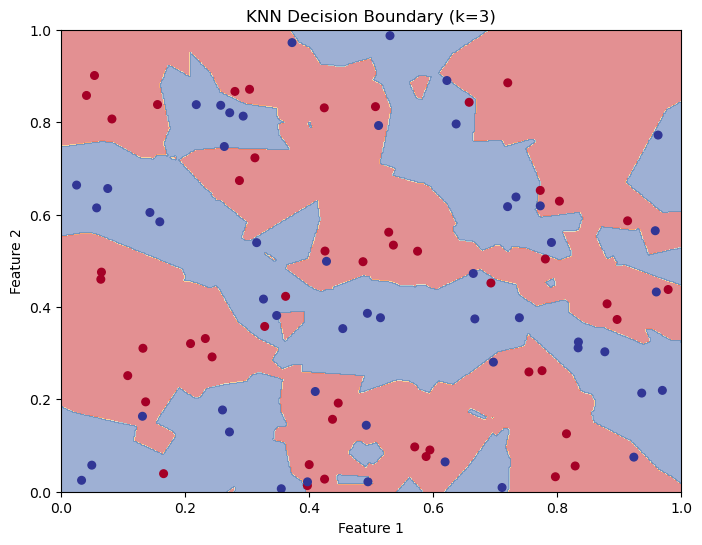

In [109]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x, y[:, 0])


xx, yy = np.meshgrid(np.linspace(0, 1, 500), np.linspace(0, 1, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions for the grid points
Z = knn_classifier.predict(grid_points)

# Reshape the predictions to match the shape of the mesh grid
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], cmap=plt.cm.RdYlBu, s=30)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KNN Decision Boundary (k={k})")
plt.show()

### Q7

In [119]:
x[[2]].shape

(1, 2)

In [120]:
for k in range(1, 50):
    for run in range(100):
        S_x = np.random.random(size=(100, 2))
        S_y = np.random.randint(0, 2, size=(100, 1))

        x = np.random.random(size=(5000, 2))
        head_tails = np.random.choice([0, 1], size=(5000, 1), p=[0.2, 0.8])
        y = np.zeros((5000, 1))

        for i, test_point in enumerate(head_tails):
            if test_point == 1:  # KNN head
                y[i, 0] = knn_label(np.copy(S_x), np.copy(S_y), x[[i]])

            else:  # Tails
                y[i, 0] = np.random.randint(0, 2, size=(100, 1))

        x_train, x_test, y_train, y_test = train_test_split(
            x, y, train_size=0.8, random_state=np.random.RandomState()
        )

In [90]:
b = 23

In [91]:
c = 34

In [92]:
d = 34

In [93]:
e = 23

In [94]:
f = 23

In [15]:
from nptyping import NDArray, Int, Shape


def test(a: NDArray[Shape["2, 2"], Int]):
    print(a)


test(np.array([1, 1, 2, 3.8, 3]))

[1.  1.  2.  3.8 3. ]


In [18]:
isinstance(np.array([[1, 2], [3, 4]]), NDArray[Shape["2, 2"], Int])

True